# Note on titanic binary classification project

**Objective**: Predict the survival of passengers on the Titanic using sklearn models

https://www.kaggle.com/c/titanic/data


## ** Step 1 **: Load libraries

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

%matplotlib inline

## ** Step 2 **: Need to load data set from a csv file. 

Numpy's genfromtxt can be used, however, because ',' is present in string, use pandas's read_csv instead.

In [2]:
#load data sets
data_set = pd.read_csv('data/train.csv', delimiter=',', quotechar='"')
test_set = pd.read_csv('data/test.csv', delimiter=',', quotechar='"')

In [3]:
#have a look at the training data
data_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Step 3: Look at data and replace missing values

In [4]:
# show missing data
print('Missing data in each feature in training set:\n', data_set.isnull().sum())

Missing data in each feature in training set:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# replacing missing values in 'Age' with median age
median_age = data_set['Age'].median()
data_set['Age'].fillna(median_age, inplace=True)
print('Median age =', median_age)

Median age = 28.0


In [6]:
# replace 2 missing embarked values by first finding the most frequent value
port = data_set['Embarked'].value_counts().idxmax()
data_set['Embarked'].fillna(port, inplace=True)

# Check data_set again, should only have 'Cabin' missing
data_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
#check missing values in test set
print('Missing data in each feature in test set:\n', test_set.isnull().sum())

Missing data in each feature in test set:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
# replace mssing values in 'Age' with median age
median_age = test_set['Age'].median()
test_set['Age'].fillna(median_age, inplace=True)
print('Median age in test set =', median_age)

#replace missing fare value with mean value
test_set['Fare'].fillna(test_set['Fare'].mean(), inplace=True)

# check test_set missing values again
test_set.isnull().sum()

Median age in test set = 27.0


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## Step 4: Data exploratory analysis

Have a look at different features to decide what's important

In [9]:
n_train = data_set.shape[0]
n_test = test_set.shape[0]
n_x = data_set.shape[1]

print("Number of data examples: n_train = " + str(n_train))
print("Number of testing examples: n_test = " + str(n_test))
print("Number of all features for each example: n_x = " + str(n_x))

Number of data examples: n_train = 891
Number of testing examples: n_test = 418
Number of all features for each example: n_x = 12


In [10]:
# Different features in the data set
data_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# Output labels
y = data_set['Survived']

In [12]:
# Label 'gender male = 1, female = 0'
data_set['Sex'] = data_set['Sex'].map({'female' : 0, 'male' : 1})
test_set['Sex'] = test_set['Sex'].map({'female' : 0, 'male' : 1})

In [13]:
# see how many unique values there are for 'Embarked'
data_set.groupby('Embarked')['PassengerId'].nunique()

Embarked
C    168
Q     77
S    646
Name: PassengerId, dtype: int64

In [14]:
# Label Embarked'
data_set['Embarked'] = data_set['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})
test_set['Embarked'] = test_set['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})

### Analyze input features
* `PassengerId` does not carry any meaningful information and can be ignored
* `Name`: maybe titles can be analyze for information on status but for now can be ignored
* `Embarked` gives the Port of Embarkation with C = Cherbourg, Q = Queenstown, S = Southampton. Can we perhaps safely ignore this feature?? Let's have a look below.
* `Cabin` may be useful, but a lot of data are missing and cannot be meaningfully filled in 
* `Ticket` does not appear to carry meaningful information and will be ignored for now
* `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, and `Fare` are included for now.

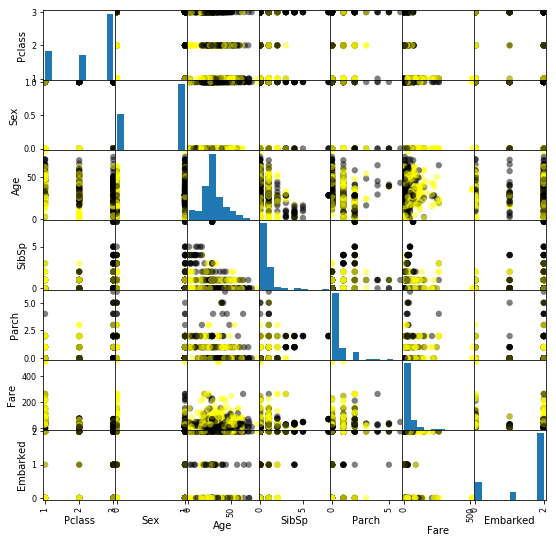

In [15]:
# plotting a scatter matrixb
from matplotlib import cm

columns_to_plot = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(data_set[columns_to_plot], c= data_set['Survived'], marker = 'o', s=40, hist_kwds={'bins':10}, figsize=(9,9), cmap=cmap)

It appears that there is a strong correlation between Sex and survival. Women tend to survive. So do children.
* (Sex, Fare): Women with higher fares seem to have a higher survival rate than women with lower fares. Men with the highest fares seemed to survive.
* (Sex, Parch): Women with fewer children/parents have higher survival rate. No clear trend for men.
* (Sex, SibSp): No clear trend for both men and women
* (Sex, age range): Not very clear trend for both men and women
* (Sex, Pclass): Women in 1st and 2nd class survived while women in 3rd class didn't. No clear trend for men.
* (Sex, Embarked): It appears that for both genders, but more so for women, people embarking at Cherbourg had a better chance of survival.

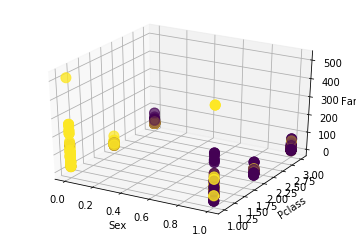

In [16]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data_set['Sex'], data_set['Pclass'], data_set['Fare'], c = data_set['Survived'], marker = 'o', s=100)
ax.set_xlabel('Sex')
ax.set_ylabel('Pclass')
ax.set_zlabel('Fare')
plt.show()

In [17]:
data_set.groupby(['Ticket'])['PassengerId'].nunique()

Ticket
110152               3
110413               3
110465               2
110564               1
110813               1
111240               1
111320               1
111361               2
111369               1
111426               1
111427               1
111428               1
112050               1
112052               1
112053               1
112058               1
112059               1
112277               1
112379               1
113028               1
113043               1
113050               1
113051               1
113055               1
113056               1
113059               1
113501               1
113503               1
113505               2
113509               1
                    ..
SOTON/OQ 392082      1
SOTON/OQ 392086      1
SOTON/OQ 392089      1
SOTON/OQ 392090      1
STON/O 2. 3101269    1
STON/O 2. 3101273    1
STON/O 2. 3101274    1
STON/O 2. 3101275    1
STON/O 2. 3101280    1
STON/O 2. 3101285    1
STON/O 2. 3101286    1
STON/O 2. 3101288    1
STON

For the time beging I don't think I can draw useful information from `ticket`.

In [18]:
# Decide if 'Embarked' might be important
data_set[['Embarked', 'Survived']].groupby('Embarked').mean()

,Survived
Embarked,
0,0.553571
1,0.389610
2,0.339009


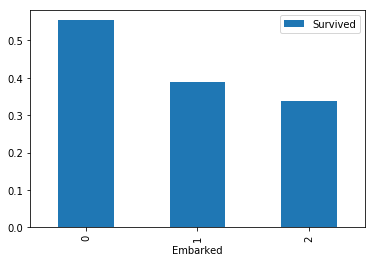

In [19]:
data_set[['Embarked', 'Survived']].groupby('Embarked').mean().plot(kind='bar')

It appears that although a large portion of passengers departed from Southampton, and a significant fraction of people departing from Cherbourg survived. Perhaps I should include this information

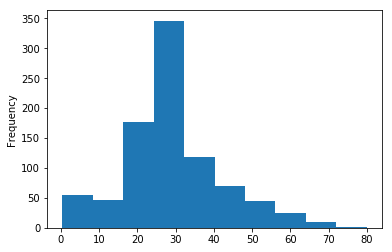

In [20]:
# Analyze how age plays a role
data_set['Age'].plot.hist()

So it appears that most passengers on board are from 20 to 40. What was the survival rate?

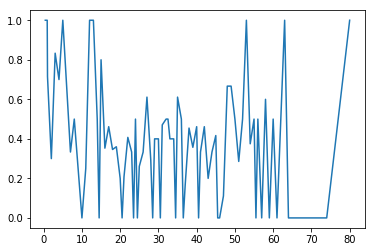

In [21]:
age = data_set[['Age', 'Survived']].groupby('Age').mean()
plt.plot(age)

It's hard to see from this graph. Let's attempt to see graphically the percent of people who survived in different age category.

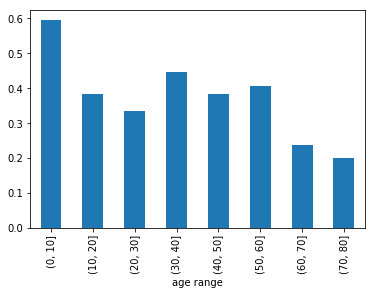

In [22]:
bins = np.arange(0, 90, 10)
data_set['age range'] = pd.cut(data_set['Age'], bins)

data_set.groupby('age range')['Survived'].mean().plot(kind='bar')

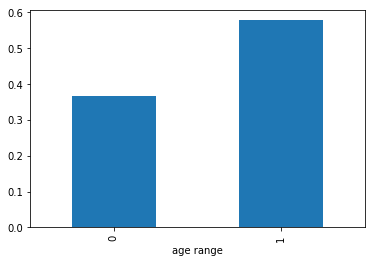

In [23]:
data_set['age range'] = np.where(data_set['Age'] < 15, 1, 0) # child = 1, adult = 0

data_set.groupby('age range')['Survived'].mean().plot(kind='bar')

There appears to be a significant difference in survival between the two age groups. 

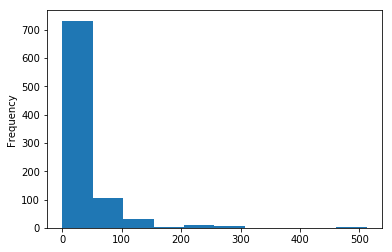

In [24]:
# analyze passenger fares
data_set['Fare'].plot.hist()

In [25]:
# Max fare
data_set['Fare'].max()

512.3292

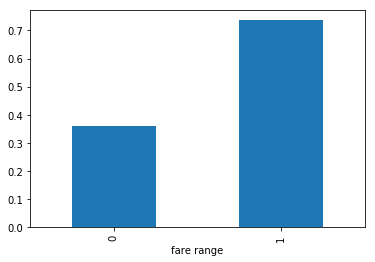

In [26]:
data_set['fare range'] = np.where(data_set['Fare'] > 100, 1, 0)
data_set.groupby('fare range')['Survived'].mean().plot(kind='bar')

In [27]:
print('Percent of people who bought high fares is: ',
len(data_set[data_set['Fare'] > 100])/len(data_set))

print('Survival rate of people who bought low fares (Fare <= 100) and high fares (Fare > 100) is: ',
data_set.groupby('fare range')['Survived'].mean())


Percent of people who bought high fares is:  0.05948372615039282
Survival rate of people who bought low fares (Fare <= 100) and high fares (Fare > 100) is:  fare range
0    0.361575
1    0.735849
Name: Survived, dtype: float64


It appears that a majority of tickets were below 100, but a significant portion of people whose fares were larger than 100 survived.

In [28]:
# Extract some starting features for input X
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'age range', 'fare range']
X_temp = data_set[features]

# print X
X_temp.head()

,Pclass,Sex,SibSp,Parch,Embarked,age range,fare range
0,3,1,1,0,2,0,0
1,1,0,1,0,0,0,0
2,3,0,0,0,2,0,0
3,1,0,1,0,2,0,0
4,3,1,0,0,2,0,0


In [29]:
# survival rate of female (0) vs. male (1)
data_set[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,0,0.742038
1,1,0.188908


In [30]:
# survival rate with respect to Pclass
data_set[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [31]:
# survival rate with respect to SibSp
data_set[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [32]:
# survival rate with respect to Parch
data_set[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [33]:
# survival rate with respect to age range
data_set[['age range', 'Survived']].groupby('age range', as_index=False).mean()

,age range,Survived
0,0,0.365314
1,1,0.576923


## Step 5: Prepare train, dev, and test sets

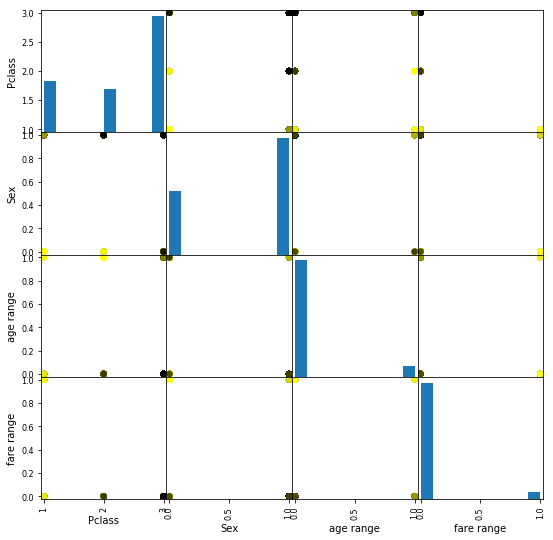

In [34]:
# Now, let's look at these features and see how they play a role
features = ['Pclass', 'Sex', 'age range', 'fare range']

# plotting a scatter matrixb
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(data_set[features], c= data_set['Survived'], marker = 'o', s=40, hist_kwds={'bins':10}, figsize=(9,9), cmap=cmap)

In [35]:
# Extract features for input X taking into account analysis above, add Sex and Embarked

X = data_set[features]

n_features = X.shape[1]
print('Number of features to train = ', n_features)

# print X
X.head()

Number of features to train =  4


,Pclass,Sex,age range,fare range
0,3,1,0,0
1,1,0,0,0
2,3,0,0,0
3,1,0,0,0
4,3,1,0,0


In [36]:
# preprocess X_test
test_set['age range'] = np.where(test_set['Age'] < 15, 1, 0)
test_set['fare range'] = np.where(test_set['Fare'] > 100, 1, 0)

#Extract the same features for X_test and label gender
X_test = test_set[features]

X_test.head()

,Pclass,Sex,age range,fare range
0,3,1,0,0
1,3,0,0,0
2,2,1,0,0
3,3,1,0,0
4,3,0,0,0


### Feature normalization

This step is important for most machine learning algorithms.

In [37]:
#normalizing input features for both data sets using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Split data set into training and cross validation (development) sets

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_dev, y_train, y_dev = train_test_split(X, y, random_state=0)

print('Number of training examples: ', X_train.shape[0])
print('Number of examples for cross validation: ', X_dev.shape[0])

Number of training examples:  668
Number of examples for cross validation:  223


## Step 6: Build a model

Here I tried quite a number of models that are builtin already in sklearn and very easily executable given the previously prepared train and dev sets.

Recall some of the metrics used to evaluate the accuracy of a model:

* Accuracy = TP + TN / (TP + TN + FP + FN)
* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
* F1 = 2 * Precision * Recall / (Precision + Recall) 

In [39]:
# threshhold for predictions
thresh = 0.5

In [57]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

knn = KNeighborsClassifier(n_neighbors = 4).fit(X_train, y_train)

#score for predictions on the dev set
print('Score for predictions on the training set using KNN: ', knn.score(X_train, y_train))
score = knn.score(X_dev, y_dev)
print('Score for predictions on the dev set using KNN: ', score)

y_pred = knn.predict(X_dev)
confusion = confusion_matrix(y_pred, y_dev)
print('k-Nearest Neighbor Classifier\n', confusion)

print('Accuracy: {:.2f}'.format(accuracy_score(y_dev, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_dev, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_dev, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_dev, y_pred)))

print('Number of survival predicted:', y_pred.sum())

print('Classification report\n', classification_report(y_dev, y_pred))

Score for predictions on the training set using KNN:  0.7979041916167665
Score for predictions on the dev set using KNN:  0.8026905829596412
k-Nearest Neighbor Classifier
 [[133  38]
 [  6  46]]
Accuracy: 0.80
Precision: 0.88
Recall: 0.55
F1: 0.68
Number of survival predicted: 52
Classification report
               precision    recall  f1-score   support

           0       0.78      0.96      0.86       139
           1       0.88      0.55      0.68        84

   micro avg       0.80      0.80      0.80       223
   macro avg       0.83      0.75      0.77       223
weighted avg       0.82      0.80      0.79       223



In [60]:
# logistic regression
from sklearn.linear_model import LogisticRegression

losreg = LogisticRegression(C = 100, solver='lbfgs', max_iter=10000).fit(X_train, y_train)
print('Score for predictions on the training set: ', losreg.score(X_train, y_train))
print('Score for predictions on the dev set: ', losreg.score(X_dev, y_dev))

y_pred = losreg.predict(X_dev)
confusion = confusion_matrix(y_pred, y_dev)
print('Logistic Regression Classifier\n', confusion)

print('Accuracy: {:.2f}'.format(accuracy_score(y_dev, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_dev, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_dev, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_dev, y_pred)))

print('Number of survival predicted:', y_pred.sum())

print('Classification report\n', classification_report(y_dev, y_pred))

Score for predictions on the training set:  0.7934131736526946
Score for predictions on the dev set:  0.7802690582959642
Logistic Regression Classifier
 [[115  25]
 [ 24  59]]
Accuracy: 0.78
Precision: 0.71
Recall: 0.70
F1: 0.71
Number of survival predicted: 83
Classification report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       139
           1       0.71      0.70      0.71        84

   micro avg       0.78      0.78      0.78       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



In [61]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
print('Score for predictions on the training set: ', tree.score(X_train, y_train))
print('Score for predictions on the dev set: ', tree.score(X_dev, y_dev))

y_pred = tree.predict(X_dev)
confusion = confusion_matrix(y_pred, y_dev)
print('Decision Tree  Classifier\n', confusion)

print('Accuracy: {:.2f}'.format(accuracy_score(y_dev, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_dev, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_dev, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_dev, y_pred)))

print('Number of survival predicted:', y_pred.sum())

print('Classification report\n', classification_report(y_dev, y_pred))

Score for predictions on the training set:  0.8068862275449101
Score for predictions on the dev set:  0.7847533632286996
Decision Tree  Classifier
 [[120  29]
 [ 19  55]]
Accuracy: 0.78
Precision: 0.74
Recall: 0.65
F1: 0.70
Number of survival predicted: 74
Classification report
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       139
           1       0.74      0.65      0.70        84

   micro avg       0.78      0.78      0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223



In [62]:
# random forest
from sklearn.ensemble import RandomForestClassifier

randforest = RandomForestClassifier(n_estimators = 100, max_features = 2, random_state=0).fit(X_train, y_train)
print('Score for predictions on the training set: ', randforest.score(X_train, y_train))
print('Score for predictions on the dev set: ', randforest.score(X_dev, y_dev))

y_pred = randforest.predict(X_dev)
confusion = confusion_matrix(y_pred, y_dev)
print('Random Forest Classifier\n', confusion)

print('Accuracy: {:.2f}'.format(accuracy_score(y_dev, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_dev, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_dev, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_dev, y_pred)))

print('Number of survival predicted:', y_pred.sum())

print('Classification report\n', classification_report(y_dev, y_pred))

Score for predictions on the training set:  0.8068862275449101
Score for predictions on the dev set:  0.7847533632286996
Random Forest Classifier
 [[120  29]
 [ 19  55]]
Accuracy: 0.78
Precision: 0.74
Recall: 0.65
F1: 0.70
Number of survival predicted: 74
Classification report
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       139
           1       0.74      0.65      0.70        84

   micro avg       0.78      0.78      0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223



In [63]:
# Multi-layer perceptron
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=[10, 100], solver='lbfgs', alpha = 1, random_state=0).fit(X_train, y_train)
print('Score for predictions on the training set: ', nn.score(X_train, y_train))
print('Score for predictions on the dev set: ', nn.score(X_dev, y_dev))

y_pred = nn.predict(X_dev)
confusion = confusion_matrix(y_pred, y_dev)
print('Decision Tree  Classifier\n', confusion)

print('Accuracy: {:.2f}'.format(accuracy_score(y_dev, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_dev, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_dev, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_dev, y_pred)))

print('Number of survival predicted:', y_pred.sum())

print('Classification report\n', classification_report(y_dev, y_pred))

Score for predictions on the training set:  0.8068862275449101
Score for predictions on the dev set:  0.7847533632286996
Decision Tree  Classifier
 [[120  29]
 [ 19  55]]
Accuracy: 0.78
Precision: 0.74
Recall: 0.65
F1: 0.70
Number of survival predicted: 74
Classification report
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       139
           1       0.74      0.65      0.70        84

   micro avg       0.78      0.78      0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223



In [64]:
# Gradient boosted decision tree
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=5).fit(X_train, y_train)
print('Score for predictions on the training set: ', gbc.score(X_train, y_train))
print('Score for predictions on the dev set: ', gbc.score(X_dev, y_dev))

y_pred = gbc.predict(X_dev)
confusion = confusion_matrix(y_pred, y_dev)
print('Decision Tree  Classifier\n', confusion)

print('Accuracy: {:.2f}'.format(accuracy_score(y_dev, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_dev, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_dev, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_dev, y_pred)))

print('Number of survival predicted:', y_pred.sum())

print('Classification report\n', classification_report(y_dev, y_pred))

Score for predictions on the training set:  0.7994011976047904
Score for predictions on the dev set:  0.8026905829596412
Decision Tree  Classifier
 [[138  43]
 [  1  41]]
Accuracy: 0.80
Precision: 0.98
Recall: 0.49
F1: 0.65
Number of survival predicted: 42
Classification report
               precision    recall  f1-score   support

           0       0.76      0.99      0.86       139
           1       0.98      0.49      0.65        84

   micro avg       0.80      0.80      0.80       223
   macro avg       0.87      0.74      0.76       223
weighted avg       0.84      0.80      0.78       223



In [65]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
print('Score for predictions on the training set: ', gnb.score(X_train, y_train))
print('Score for predictions on the dev set: ', gnb.score(X_dev, y_dev))

y_pred = gnb.predict(X_dev)
confusion = confusion_matrix(y_pred, y_dev)
print('Decision Tree  Classifier\n', confusion)

print('Accuracy: {:.2f}'.format(accuracy_score(y_dev, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_dev, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_dev, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_dev, y_pred)))

print('Number of survival predicted:', y_pred.sum())

print('Classification report\n', classification_report(y_dev, y_pred))

Score for predictions on the training set:  0.7859281437125748
Score for predictions on the dev set:  0.7713004484304933
Decision Tree  Classifier
 [[108  20]
 [ 31  64]]
Accuracy: 0.77
Precision: 0.67
Recall: 0.76
F1: 0.72
Number of survival predicted: 95
Classification report
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       139
           1       0.67      0.76      0.72        84

   micro avg       0.77      0.77      0.77       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.78      0.77      0.77       223



## Step 7: Error evaluation

So having looked at the prediction scores from different models above, I decided to just go with random forest. Althought it appears to overfit the data, I thought the score on the dev set was an improvement compared to what I got before on the actual Kaggle test set (0.77). However, it turns out that my prediction score using RF was worse than before at 0.74. It clearly seems to indicate that a more serious model evaluation and feature tuning is necessary.

[tobedone]

## Step 8: Make final predictions on the unseen test set 

Let's say we have finally come to choose a model and are ready to make our predictions for submission. 

In [47]:
# Make predictions on unseen data using SVM
y_pred = randforest.predict(X_test)
#y_pred = np.where(y_pred >= thresh, 1, 0)
y = pd.DataFrame(data=y_pred, columns=['Survived'])
y.insert(loc=0, column='PassengerId', value=test_set['PassengerId'])

In [48]:
y.to_csv('data/submission_AR.csv', index=False)

In [49]:
print('Number of people who survived: ', y['Survived'].sum())

Number of people who survived:  150
